In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import torch
import numpy
import torch.utils.data
from sklearn.model_selection import train_test_split

In [15]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('GPU is available')
else:
    device = torch.device('cpu')
    print('CPU is available')

CPU is available


# Display Dataset

In [16]:
import sys
sys.path.append('..')
import seaborn as sns

from Datasets.LorenzAttractor import LorenzAttractor
from Datasets.MackeyGlassDataset import MackeyGlassDataset
from mpl_toolkits.mplot3d import Axes3D

attractor = LorenzAttractor(sample_len=10000, n_samples=10, 
                            xyz=[1.0, 1.0, 1.0], sigma=10.0, 
                            b=8/3, r=28.0, normalize=True)

attractor_samp = attractor[0]
attractor_samp = (attractor_samp - attractor_samp.min()) / (attractor_samp.max() - attractor_samp.min())


# Plotting the Dataset

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d(
    x=attractor_samp[:,0].numpy(), y=attractor_samp[:,1].numpy(), z=attractor_samp[:,2].numpy(),
    mode='lines',
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    title='Lorenz Attractor Trajectory',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

fig.show()

# Generating the model

In [18]:
from Models.Reservoir import Reservoir

In [19]:
inputs = attractor_samp[1:,:].to(device)
targets = attractor_samp[0:-1,:].to(device)
print(inputs.shape)
print(targets.shape)

torch.Size([9999, 3])
torch.Size([9999, 3])


In [20]:
# Initialize ESN
ResLorenz = Reservoir(input_dim=3, reservoir_dim=500, output_dim=3, 
                spectral_radius=1, leak_rate=0.3, sparsity=0.90)
ResLorenz.to(device)

Reservoir(
  (readout): Linear(in_features=500, out_features=3, bias=True)
)

# Predictions

In [21]:
ResLorenz.train_readout(inputs, targets)
predictions = ResLorenz.predict(inputs, steps=1000)

In [22]:
attractor_samp[:,0] == attractor_samp[:,1]

tensor([False, False, False,  ..., False, False, False])

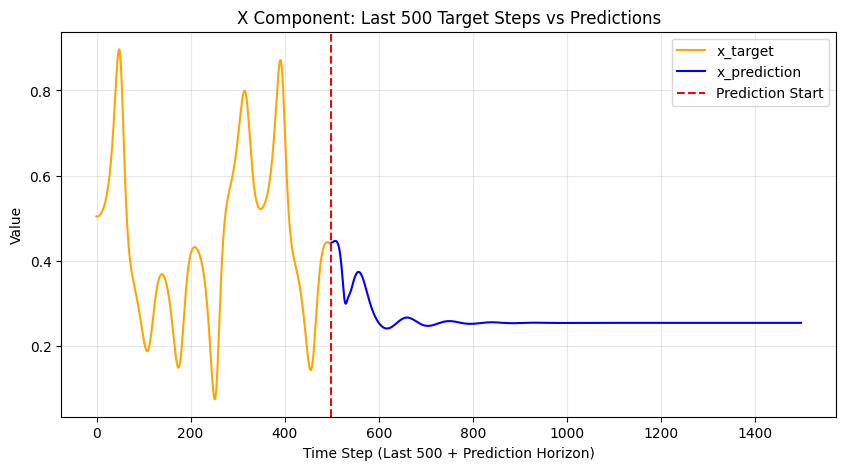

In [23]:
plt.figure(figsize=(10, 5))

# Take the last 500 samples of the target (z-component)
attractor_samp_last500 = attractor_samp[-500:, 0].numpy()

# Plot the last 500 target values (orange)
plt.plot(attractor_samp_last500, label='x_target', color='orange')

# Plot predictions (blue) starting right after the attractor ends
prediction_start = len(attractor_samp_last500) - 1
plt.plot(range(prediction_start, prediction_start + len(predictions)), 
         predictions[:, 0].numpy(), label='x_prediction', color='blue')

# Add a vertical line to mark where predictions begin
plt.axvline(x=prediction_start, color='red', linestyle='--', label='Prediction Start')

plt.legend()
plt.title('X Component: Last 500 Target Steps vs Predictions')
plt.xlabel('Time Step (Last 500 + Prediction Horizon)')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

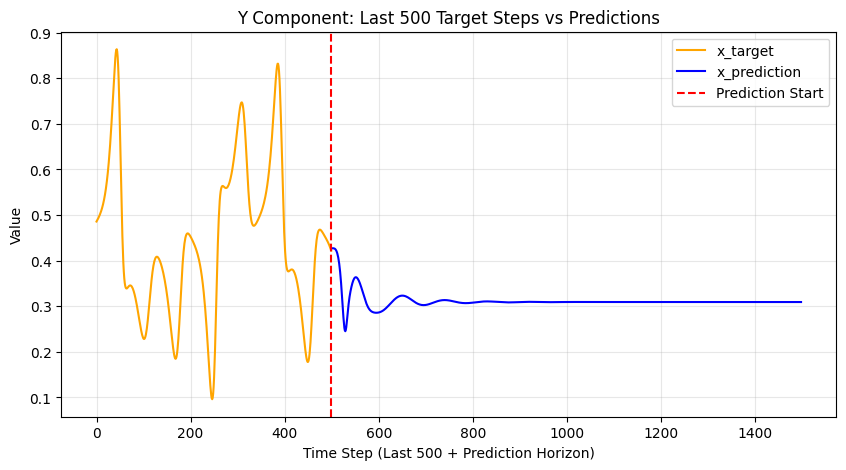

In [24]:
plt.figure(figsize=(10, 5))

# Take the last 500 samples of the target (z-component)
attractor_samp_last500 = attractor_samp[-500:, 1].numpy()

# Plot the last 500 target values (orange)
plt.plot(attractor_samp_last500, label='x_target', color='orange')

# Plot predictions (blue) starting right after the attractor ends
prediction_start = len(attractor_samp_last500) - 1
plt.plot(range(prediction_start, prediction_start + len(predictions)), 
         predictions[:, 1].numpy(), label='x_prediction', color='blue')

# Add a vertical line to mark where predictions begin
plt.axvline(x=prediction_start, color='red', linestyle='--', label='Prediction Start')

plt.legend()
plt.title('Y Component: Last 500 Target Steps vs Predictions')
plt.xlabel('Time Step (Last 500 + Prediction Horizon)')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

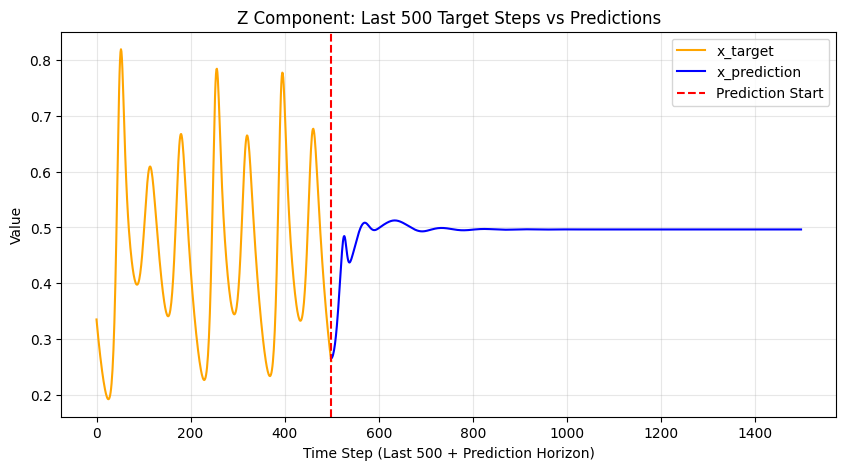

In [25]:
plt.figure(figsize=(10, 5))

# Take the last 500 samples of the target (z-component)
attractor_samp_last500 = attractor_samp[-500:, 2].numpy()

# Plot the last 500 target values (orange)
plt.plot(attractor_samp_last500, label='x_target', color='orange')

# Plot predictions (blue) starting right after the attractor ends
prediction_start = len(attractor_samp_last500) - 1
plt.plot(range(prediction_start, prediction_start + len(predictions)), 
         predictions[:, 2].numpy(), label='x_prediction', color='blue')

# Add a vertical line to mark where predictions begin
plt.axvline(x=prediction_start, color='red', linestyle='--', label='Prediction Start')

plt.legend()
plt.title('Z Component: Last 500 Target Steps vs Predictions')
plt.xlabel('Time Step (Last 500 + Prediction Horizon)')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
fig = go.Figure(data=[go.Scatter3d(
    x=predictions[:,0].numpy(), 
    y=predictions[:,1].numpy(), 
    z=predictions[:,2].numpy(),
    mode='lines',
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    title='Lorenz Attractor Trajectory',
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)